
# Week 7 Decision Trees
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Tutorial Overview
Hi everyone! Welcome to the week 7 Lab - Decision Trees!

Here's an outline of the lab:

     1) Applying Decision Trees to a toy dataset (Iris) and visualizing the tree

     2) Applying Decision Trees to a harder problem: MNIST

     3) Applying Decision Trees on a more complex problem/dataset: 


Here, you will get a more detailed and rich introduction!





**Tips to get the most out of this tutorial:**
1. Make sure you carefully read and understand how the example code works.  
2. Try your best before looking at the hidden solutions








# Applying Decision Trees to a toy dataset

In this section we'll take a look at a dataset that we saw last time: The IRIS dataset. Recall that this is a labelled dataset that has 4 features for each datapoint. It stores the sepal length in cm for a flower, the sepal width in cm, the petal length in cm, and the petal width in cm. It also has a label telling us which flower this data point is for. There are 3 possible classes (i.e. types of flowers) represented in this data set: Iris Setosa, Iris Versiclolour, and Iris Virgnica. There are 150 samples (datapoints) in this dataset. Lets import the dataset. 

In [1]:
from sklearn.datasets import load_iris
import numpy as np

# SKLearn actually has a very simple way to retrieve this dataset:
data, labels = load_iris(return_X_y=True)

# Brining the data *and* labels into a single np array
all_data = np.concatenate((data, labels.reshape(150, 1)), axis=1)

#Shuffling the array
np.random.shuffle(all_data)

X = all_data[:, 0:4]
y = all_data[:, 4]

Now we'll instantiate and fit a decision tree model, and even visualize it. Split X and y into X_train y_train X_test and y_test, allocating 60% of the data for training, and 40% for testing, and fit the model. We've provided the code to plot the tree at the end.

AttributeError: ignored

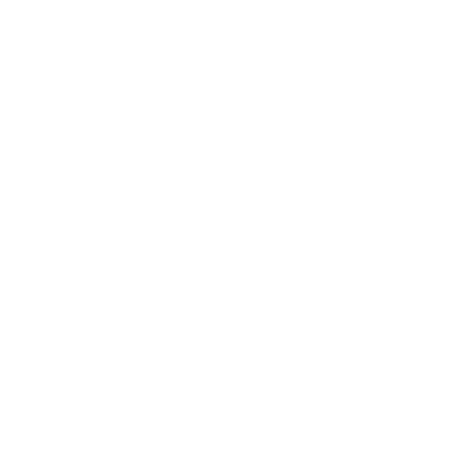

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
#TODO: Define X_train, X_test, y_train, and y_test



tree_model = tree.DecisionTreeClassifier()
#TODO: Fit the model

# We can even visualize it using tree.plot_tree()!
plt.figure(figsize=(8, 8))
tree.plot_tree(tree_model)
plt.show()


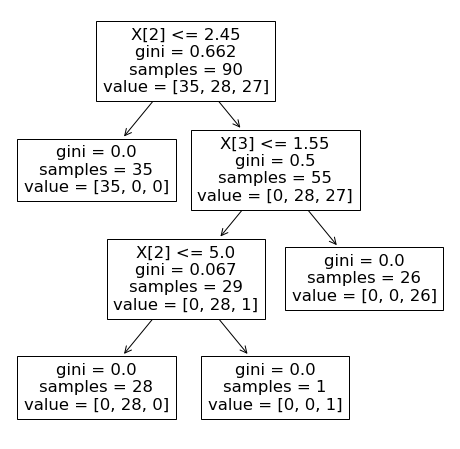

In [2]:
#@title Solution (Double Click To See)
from sklearn import tree
import matplotlib.pyplot as plt

# Since 150*.6 = 90, we will have 90 samples for training data and leave the
# rest for testing
X_train = X[0:90]
y_train = y[0:90]

X_test = X[90:]
y_test = y[90:]

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

# We can even visualize it using tree.plot_tree()!
plt.figure(figsize=(8, 8))
tree.plot_tree(tree_model)
plt.show()


Notice that each node in our tree above shows the gini impurity value, and it shows what condition it used at each node.


Let's see how accurate our model is:

In [3]:
num_correct = 0
for sample, label in zip(X_test, y_test):
  # Note we reshape the sample slightly. Try removing the reshape() and see
  # what happens!
  if tree_model.predict(sample.reshape(1, -1)) == label:
      num_correct += 1
  

print("Total Correct: ", num_correct)
print("Percent classified correctly: ", num_correct/len(X_test))


Total Correct:  54
Percent classified correctly:  0.9


# Applying Decision Trees to the MNIST dataset
We'll be using the MNIST dataset once again, but this time we'll be applying decision trees to generate predictions. 

The values that we use to make decisions at each node are simply going to be pixel values (i.e. 'Is the 10th pixel > 145?' or 'Is the 589th pixel >190?')

Let's start! 


In [4]:
import pandas as pd
from sklearn.datasets import fetch_openml

### Getting the MNIST data


This should look familiar from last week :)

In [5]:
# Loading the MNIST dataset

mnist = fetch_openml('mnist_784')

# These are the images
mnist.data.shape


(70000, 784)

In [6]:
# These are the labels
mnist.target.shape

(70000,)

### Splitting our dataset

In [7]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [8]:
# training images
print(train_img.shape)
# training labels
print(train_lbl.shape)
# test images
print(test_img.shape)
# test labels
print(test_lbl.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


Let's take a look at how the decision tree performs with this dataset:

In [9]:
# Use what you learned this week to instantiate, train, and predict using the 
# decision tree object. Check out this page: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
# to see what hyperparameters you can tune. Try testing this with Gini
# impurity vs Entropy!


count = 0

# TODO:
mnist_tree_model = tree.DecisionTreeClassifier()


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))


NameError: ignored

In [10]:
#@title Solution (Double click to see)
# SOLUTION



mnist_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
mnist_tree_model.fit(train_img, train_lbl)

predictions = mnist_tree_model.predict(test_img)
count = 0
for i in range(len(predictions)):
  if predictions[i] == test_lbl[i]:
    count += 1



# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Accuracy:  0.8815


Let's try and visualize this tree:

In [ ]:
plt.figure(figsize=(75, 75))
tree.plot_tree(mnist_tree_model)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

A bit difficult to visualize isn't it? What if we apply PCA?

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting on training set.
scaler.fit(train_img)

# applying transformation on both the train and test image set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

Now, we'll instantiate PCA. The 0.95 for the number of components tells scikit learn to choose the minimum number of components so that 95% of the variance is explained by them. This is much easier than manually trying different values, as we did with the Iris dataset!

In [12]:
from sklearn.decomposition import PCA
# Make an instance of the PCA model
pca = PCA(.95)

In [13]:
# fitting on the train dataset
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# these are the components of the PCA model
pca.n_components_

327

In [16]:
# using the PCA model to transform both the training and test data
pca_train_img = pca.transform(train_img)
pca_test_img = pca.transform(test_img)

We can go from a compressed representation (327 components) back to an approximation of the original high dimensional data (784 components).

In [17]:
approximation = pca.inverse_transform(pca_train_img)

In [ ]:
approximation[0]

array([ 2.86747407e-16,  1.61139472e-14, -8.47971740e-16, -6.46054097e-15,
       -9.00530089e-16, -4.22338148e-15, -8.68436168e-16,  3.36479794e-16,
        1.90253150e-15, -2.11994766e-15, -1.34962446e-17,  9.61478210e-16,
       -1.91057851e-04, -1.91057851e-04, -1.91057851e-04, -1.91057851e-04,
        1.90868859e-15, -1.06054239e-16, -4.59617641e-16, -2.21527203e-16,
       -3.65890841e-16,  4.42841269e-16,  1.61770762e-16,  3.17043810e-16,
        6.29772245e-16,  6.57641870e-16,  1.87402027e-16, -5.49336942e-16,
       -4.27207802e-16,  2.27652424e-16,  3.31835404e-16,  8.92267550e-16,
        2.27306013e-16,  2.29852446e-03,  1.04545659e-02, -2.20913948e-02,
       -7.45941803e-02, -3.43669506e-03,  1.54238533e-02, -4.31671277e-02,
       -3.13464287e-02,  1.29511119e-02, -5.18695023e-02, -2.58115941e-02,
       -1.55098276e-02, -5.63401323e-02, -6.23202713e-03, -7.59520833e-03,
       -1.50558872e-02,  3.47441635e-04, -4.76493260e-03, -5.45977466e-03,
        3.45289669e-16,  

In [18]:
mnist_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
mnist_tree_model.fit(pca_train_img, train_lbl)

predictions = mnist_tree_model.predict(pca_test_img)
count = 0
for i in range(len(predictions)):
  if predictions[i] == test_lbl[i]:
    count += 1



# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Accuracy:  0.8378


Now lets try visualizing again!

In [ ]:
plt.figure(figsize=(75, 75))
tree.plot_tree(mnist_tree_model)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Not as bad, but still not great.


When it comes to decision trees that have hundreds, thousands, or even hundreds of thousands of nodes, visualization isn't really possible in this way.

You are encouraged to try making the PCA more aggressive so that there are fewer dimensions in our data, and thus fewer nodes in the tree! But keep an eye on the accuracy, this will likely start to fall.

#Another dataset with decision trees
We've been mainly using the MNIST dataset to train our models. Why don't we take a look at another dataset to see if you can apply what we've learned so far on problems that use real-world values.

In this eample we'll be performing classifcation on some faces using sklearn's lfw_people dataset. This challenge is also difficult because the dataset contains many faces that are not statically positioned, meaning the model must be able to learn faces in less constrained environments.

In [19]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [21]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# This is a way to efficiently acquire information about the shape of the dataset
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# TODO:
# split into a training and testing set



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [22]:
#@title Click for solution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [23]:
#We want to use PCA to reduce the dimensionality of our dataset
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 150 eigenfaces from 966 faces
done in 0.327s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.063s


In [24]:
# Train the tree classification model

print("Fitting the classifier to the training set")
t0 = time()
#TODO:
lfw_tree_model = 0

print("done in %0.3fs" % (time() - t0))

Fitting the classifier to the training set
done in 0.000s


In [25]:
#@title Click for solution
lfw_tree_model = tree.DecisionTreeClassifier(criterion="entropy")
lfw_tree_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let's take a look at what this tree looks like!

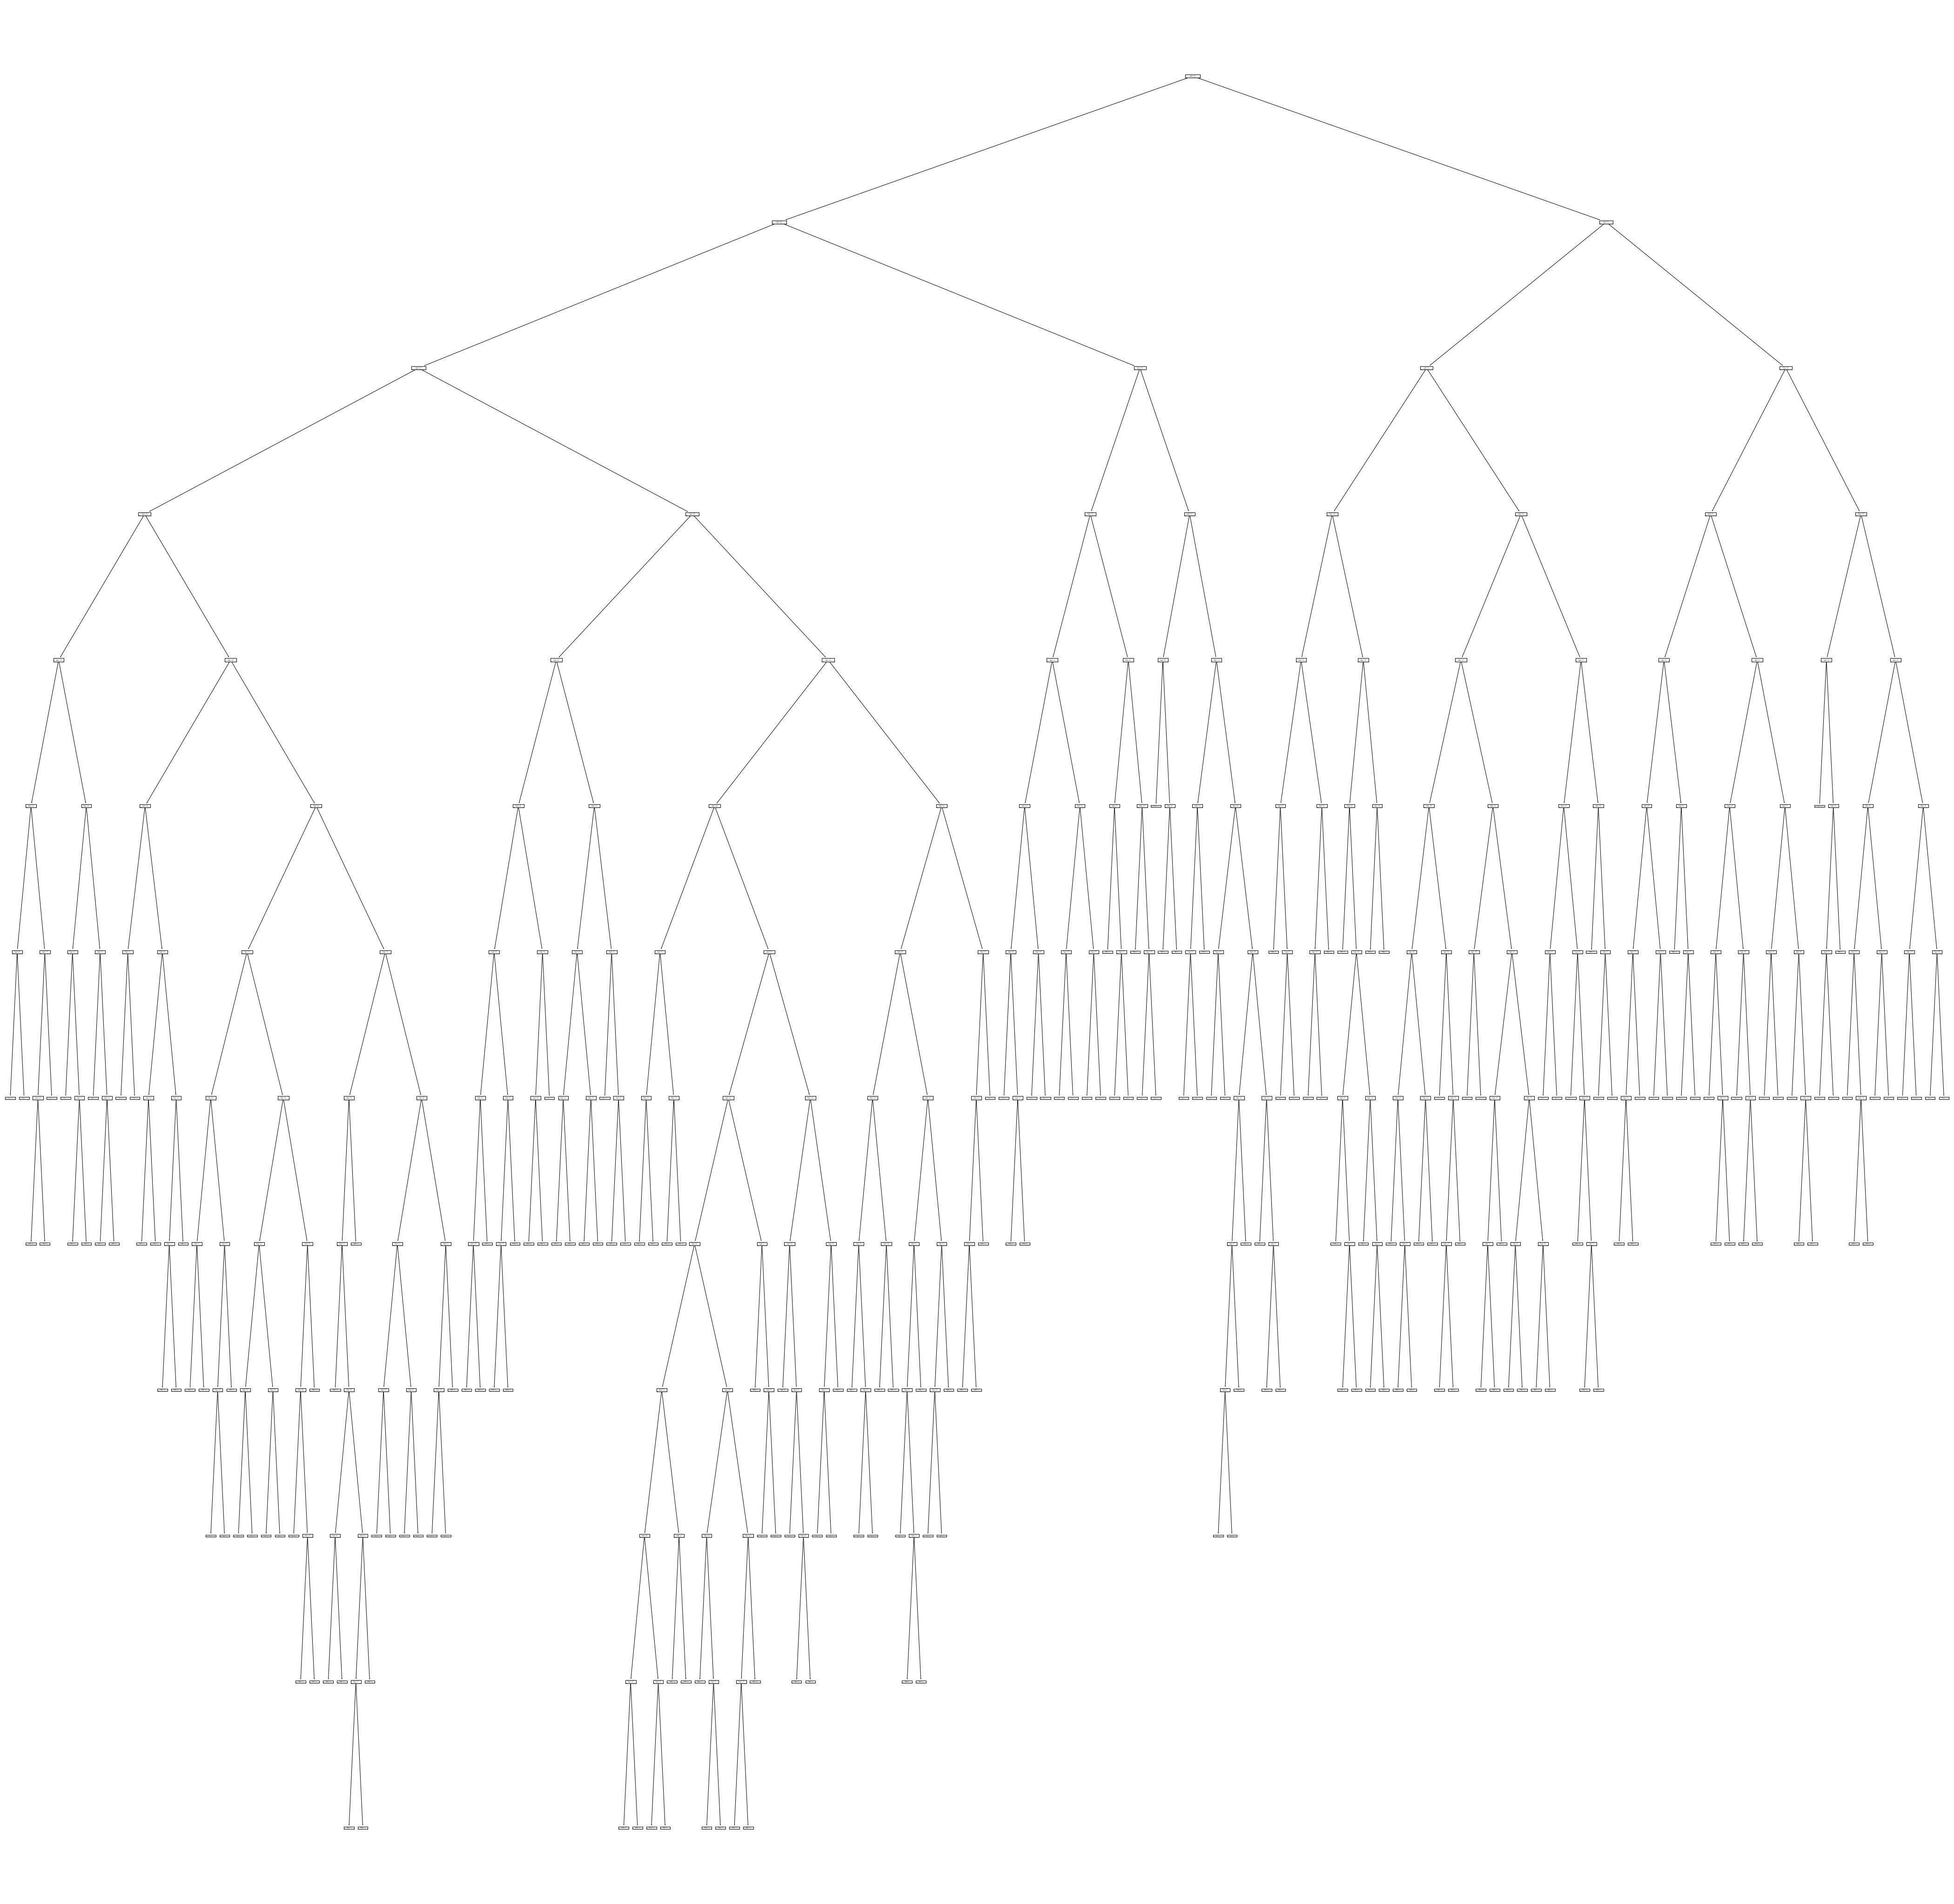

In [26]:
plt.figure(figsize=(75, 75))
tree.plot_tree(lfw_tree_model)
plt.show()

In [27]:
y_pred = lfw_tree_model.predict(X_test_pca)

count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count += 1

# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(y_pred))

# This gives you more information about the performance of the model
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Accuracy:  0.37888198757763975
                   precision    recall  f1-score   support

     Ariel Sharon       0.09      0.15      0.11        13
     Colin Powell       0.43      0.48      0.46        60
  Donald Rumsfeld       0.23      0.22      0.23        27
    George W Bush       0.56      0.49      0.52       146
Gerhard Schroeder       0.12      0.12      0.12        25
      Hugo Chavez       0.19      0.27      0.22        15
       Tony Blair       0.21      0.19      0.20        36

         accuracy                           0.38       322
        macro avg       0.26      0.28      0.27       322
     weighted avg       0.40      0.38      0.39       322

[[ 2  1  4  5  1  0  0]
 [ 3 29  1 20  3  1  3]
 [ 3  4  6 10  4  0  0]
 [13 23 12 71  9  5 13]
 [ 1  1  1  7  3  6  6]
 [ 0  2  0  1  3  4  5]
 [ 1  7  2 12  2  5  7]]


It seems like our model doesn't do too great with this kind of problem. That's alright though! We haven't touched hyperparameter optimization and we knew this challenge was goung to be especially difficult since the model hasn't been provided with faces that were posed consistently, making learning very difficult. You'll learn eventually about other models that can deal with this better!

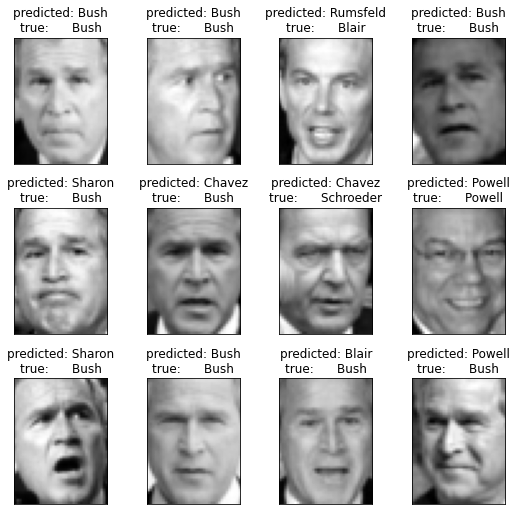

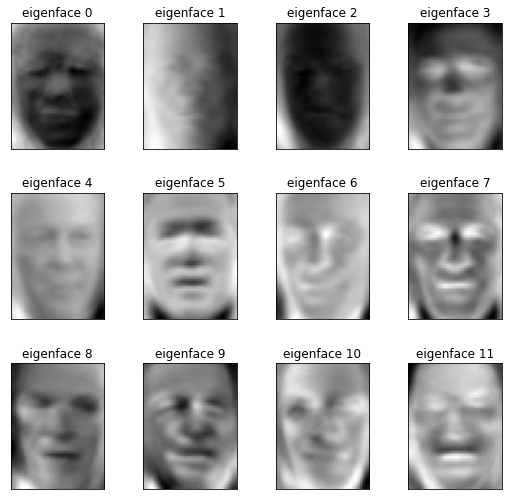

In [28]:
# You don't really need to understand what's going on in the code. We just wanted
# to show you a way to organize your results in a visually understandable way.
# We can also tell from the ghoulish images what PCA does to reduce 
# the dimensionaity of your data!


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

# References

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html


